**Enlace al archivo:**

https://colab.research.google.com/drive/12xMYR_OanNzz9WcquT_6xi5Ijls5q80B?usp=sharing

**Integrantes:**
- Brayan Vanegas - 1866040
- Carlos Mauricio Serna Vivas - 1667603
- Luis Eduardo Henao Padilla - 1667483
---

Librerías a Importar

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.externals import joblib


import pandas as pd
import glob
import matplotlib.pyplot as plt


Etiquetas de las distintas clases de insectos

In [ ]:
labels_text = ['Butterfly','Grasshopper', 'Ladybird', 'Mosquito']

---
Descargarmos los Datasets de GitHub:


In [ ]:
!wget https://github.com/luiseduardo23/dataset_insectos/raw/main/Butterfly.zip
!wget https://github.com/luiseduardo23/dataset_insectos/raw/main/Grasshopper.zip
!wget https://github.com/luiseduardo23/dataset_insectos/raw/main/Ladybird.zip
!wget https://github.com/luiseduardo23/dataset_insectos/raw/main/Mosquito.zip

---
Creamos una carpeta que contenga las imagenes de los insectos

In [ ]:
!mkdir bugs

---
Movemos los archivos zip a la carpeta bugs

In [ ]:
!mv "/content/Butterfly.zip" "/content/bugs"
!mv "/content/Ladybird.zip" "/content/bugs"
!mv "/content/Mosquito.zip" "/content/bugs"
!mv "/content/Grasshopper.zip" "/content/bugs"

---
Extraemos los Datasets:

In [ ]:
%cd bugs
!unzip Mosquito.zip
!unzip Ladybird.zip
!unzip Butterfly.zip
!unzip Grasshopper.zip

---
# Procesamiento de las imagenes


1. De cada dataset (Butterfly, Grasshopper, Ladybird, Mosquito), almacenamos los datos de las imagenes y sus respectivas categorías en dos np.array (data, labels), data contiene los datos de las imagenes en escalas de gris,y los labels puede tener 4 categorías posibles:

*   0 = Butterfly
*   1 = Grasshopper
*   2 = Ladybird
*   3 = Mosquito



In [ ]:
Butterfly = glob.glob('Butterfly/*.*')
Grasshopper = glob.glob('Grasshopper/*.*')
Ladybird = glob.glob('Ladybird/*.*')
Mosquito = glob.glob('Mosquito/*.*')

data = []
labels = []

for i in Butterfly:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', 
    target_size= (100,100))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in Grasshopper:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', 
    target_size= (100,100))
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in Ladybird:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', 
    target_size= (100,100))
    image=np.array(image)
    data.append(image)
    labels.append(2)
for i in Mosquito:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', 
    target_size= (100,100))
    image=np.array(image)
    data.append(image)
    labels.append(3)

data = np.array(data)
labels = np.array(labels)

---
2. Repartirmos los datos entre el conjunto de entrenamiento y prueba (los conjuntos train tendrá el 80%, y los conjuntos test el 20% de los datos correspondientes), y aplanamos las salidas (y) para evitar errores con las dimensiones del arreglo

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)
y_train = y_train.flatten()
y_test= y_test.flatten()

x_train_l, x_test_l, y_train_l, y_test_l = x_train, x_test, y_train, y_test

---
3.  Hacemos un muestreo del conjunto x_train y y_train

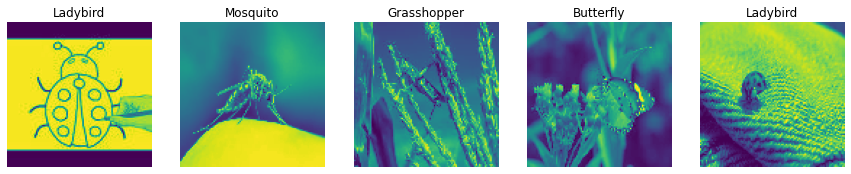

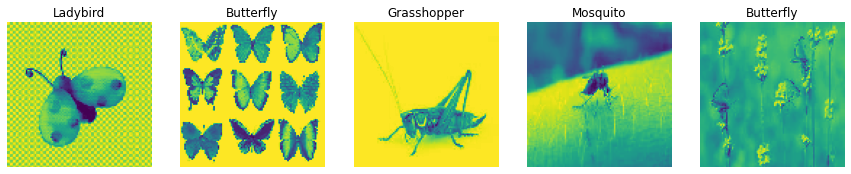

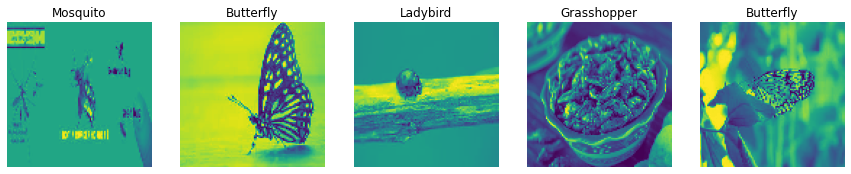

In [ ]:
n_classes = len(labels_text)
for i in range(15):
    if i%5==0:
        fig, ax = plt.subplots(ncols=5, figsize=(15,15))
    img= x_train[i]
    lbl= y_train[i]
    ax[i%5].imshow(img)
    ax[i%5].set_title(labels_text[lbl])
    ax[i%5].grid(False)
    ax[i%5].axis(False)


---
4. Redimensionamos los conjuntos de imagenes, para obtener un vector de cada imagen

In [ ]:
n_test, length_test, height_test = x_test.shape
n_train, length_train, height_train = x_train.shape 

x_test= x_test.reshape(-1,length_test*height_test*1)
x_train= x_train.reshape(-1,length_train*height_train*1)

In [ ]:
x_train.shape

(2730, 10000)

---
5. Escalamos los valores de los vectores imagenes entre 1 y 0, dividiendo el conjunto sobre 255

In [ ]:
x_test = x_test/255
x_train = x_train/255

---

#  Perceptrón multicapa



---


**MLP Keras**

In [ ]:
modelo_keras = keras.Sequential(
    [
    keras.Input(shape=x_train.shape[1]),
    layers.Dense(10000,activation="relu"),
    layers.Dense(5000,activation="relu"),
    layers.Dense(3333,activation="relu"),
    layers.Flatten(),
    layers.Dense(4,activation="softmax")
    ]
)

In [ ]:
modelo_keras.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10000)             100010000 
_________________________________________________________________
dense_1 (Dense)              (None, 5000)              50005000  
_________________________________________________________________
dense_2 (Dense)              (None, 3333)              16668333  
_________________________________________________________________
flatten (Flatten)            (None, 3333)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 13336     
Total params: 166,696,669
Trainable params: 166,696,669
Non-trainable params: 0
_________________________________________________________________


---
Usamos como función de perdida "categorical_hinge" la cual es usada genegeralmente para el entrenamiento de clasificadores de multiples clases.

La probabilidad de la clase correcta en un valor **y_predecido** debe ser mayor que la suma de las probabilidades de todas las demás clases. La función hinge posee esta propiedad, por ejemplo

Si `y_real[i] =[1,0,0,0]` e `y_predecido[i] =[0.6, 0.1, 0.25, 0.05]` podemos observar que la probabilidad de la clase en el indice 0 es la correcta, por lo tanto, 0.6 es mayor que la suma de las probabilidades de todas las demas clases.

https://becominghuman.ai/loss-functions-in-neural-networks-ec6482a15e97

In [ ]:
num_classes=4
modelo_keras.compile(loss="categorical_hinge", optimizer="SGD", metrics=["accuracy","MeanSquaredError"])



---

In [ ]:
y_train_keras = keras.utils.to_categorical(y_train, num_classes)
y_test_keras= keras.utils.to_categorical(y_test, num_classes)

In [ ]:
historia_keras = modelo_keras.fit(x_train,y_train_keras,epochs=100,batch_size=100)

Epoch 1/100
28/28 [==============================] - 46s 2s/step - loss: 1.2619 - accuracy: 0.2788 - mean_squared_error: 0.2538
Epoch 2/100
28/28 [==============================] - 44s 2s/step - loss: 1.1018 - accuracy: 0.3443 - mean_squared_error: 0.1970
Epoch 3/100
28/28 [==============================] - 44s 2s/step - loss: 1.0271 - accuracy: 0.4000 - mean_squared_error: 0.1755
Epoch 4/100
28/28 [==============================] - 44s 2s/step - loss: 1.0275 - accuracy: 0.3883 - mean_squared_error: 0.1751
Epoch 5/100
28/28 [==============================] - 44s 2s/step - loss: 0.9938 - accuracy: 0.4352 - mean_squared_error: 0.1679
Epoch 6/100
28/28 [==============================] - 44s 2s/step - loss: 0.9839 - accuracy: 0.4707 - mean_squared_error: 0.1650
Epoch 7/100
28/28 [==============================] - 44s 2s/step - loss: 0.9640 - accuracy: 0.4868 - mean_squared_error: 0.1608
Epoch 8/100
28/28 [==============================] - 44s 2s/step - loss: 0.9561 - accuracy: 0.4945 - mea



---


**MLP SKLearn**

In [ ]:
modelo_sklearn = MLPClassifier(hidden_layer_sizes=(10000,5000,3333),
                               activation='relu',
                               verbose=True,
                               batch_size=120,
                               learning_rate_init=0.001,
                               learning_rate="adaptive",
                               max_iter=100, solver='sgd')

In [ ]:
modelo_sklearn.fit(x_train,y_train)



---


**¿Cómo determinamos el número de neuronas?**

Se escogieron los números de neuronas de las capas ocultas teniendo en cuenta que El número de neuronas ocultas para la primer capa debe ser n, para la segunda n/2 y para la tercera n/3, donde n es el tamaño de la entrada (que en nuestro caso es de 100x100, osea 10000) esto siguiendo el teorema de Hecht - Neilson

Escogimos la función de activación Relu principalmente porque es de las mas usadas para redes neuronales y permite un aprendizaje rapido. Por otro lado se escogió la función de salida softmax debido a que esta función de activación se usa para clasificar datos multiclases y asigna probabilidades a cada clase, lo cual es ideal para la clasificación de los insectos por valores de probabilidad.

https://bootcampai.medium.com/redes-neuronales-13349dd1a5bb



---


# Análisis De los Resultados:

Función plot_image que recibe un indice i, el y_pred[i], y_test, x_test y 
una muestra imagen i del conjunto x_text, el valor predecido por el MLP y el valor real de la imagen, en caso de que el y_pred[i] concuerde con el real, la fuente :de las letras será azul, de caso contrario, será roja.

Función plot_value_array que recibe un indice i, y_pred[i], y_test y muestra 
una gráfica de barras con el y_pred para cada clase,en caso de que el y_pred[i] 
concuerde con el real, el color de la barra será azul, de caso contrario, será roja.



In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(labels_text[predicted_label],
                                100*np.max(predictions_array),
                                labels_text[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(4))
  plt.yticks([])
  thisplot = plt.bar(range(4), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



---


**MLP Keras**

In [ ]:
y_pred_keras = modelo_keras.predict(x_test)

In [ ]:
report_keras = classification_report(np.argmax(y_test_keras,axis=1),np.argmax(y_pred_keras,axis=1))

In [ ]:
print(report_keras)

              precision    recall  f1-score   support

           0       0.58      0.31      0.40       181
           1       0.37      0.78      0.50       170
           2       0.89      0.17      0.29       192
           3       0.51      0.69      0.58       140

    accuracy                           0.46       683
   macro avg       0.59      0.49      0.44       683
weighted avg       0.60      0.46      0.43       683



Función de perdida con n iteraciones Keras - Categorical Hinge

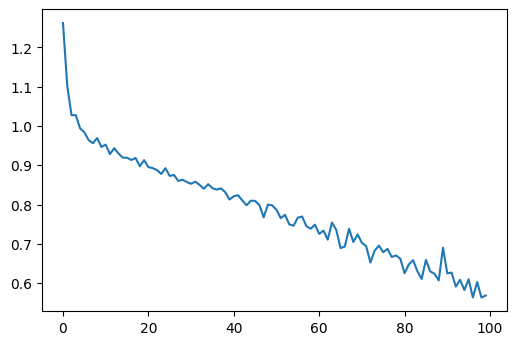

In [ ]:
plt.figure(dpi=100)
plt.plot(historia_keras.history["loss"],label="perdida")

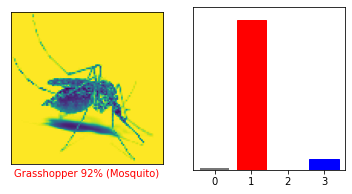

In [ ]:
#431 11 541 653 3 6 41 42 232 292 500 543 601 620 130
i = 653
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_pred_keras[i], y_test_l, x_test_l)
plt.subplot(1,2,2)
plot_value_array(i, y_pred_keras[i],  y_test_l)
plt.show()

* 0 = Butterfly
* 1 = Grasshopper
* 2 = Ladybird
* 3 = Mosquito


---



**MLP SKLearn**

In [ ]:
modelo_sklearn.score(x_test,y_test)

0.493411420204978

In [ ]:
y_pred_sklearn = modelo_sklearn.predict(x_test)

In [ ]:
report_sklearn = classification_report(y_test,y_pred_sklearn)

In [ ]:
print(report_sklearn)

              precision    recall  f1-score   support

           0       0.50      0.41      0.45       181
           1       0.41      0.48      0.44       170
           2       0.52      0.47      0.50       192
           3       0.55      0.65      0.60       140

    accuracy                           0.49       683
   macro avg       0.50      0.50      0.50       683
weighted avg       0.50      0.49      0.49       683



Función de perdida con n iteraciones SKLearn - Log Loss

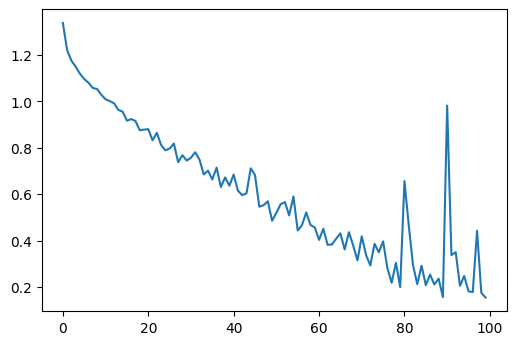

In [ ]:
loss_values = modelo_sklearn.loss_curve_
plt.figure(dpi=100)
plt.plot(loss_values)
plt.show()

In [ ]:
y_pred_sklearn = keras.utils.to_categorical(y_pred_sklearn, 4)

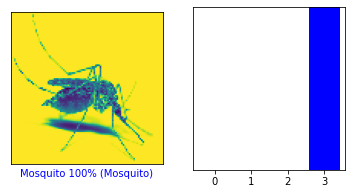

In [ ]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_pred_sklearn[i], y_test_l, x_test_l)
plt.subplot(1,2,2)
plot_value_array(i, y_pred_sklearn[i],  y_test_l)
plt.show()

* 0 = Butterfly
* 1 = Grasshopper
* 2 = Ladybird
* 3 = Mosquito


---



**Comparación de ambas librerías:**

Al comparar los reportes de clasificación de ambas liberías sobre las predicciones del conjunto de pruebas que se usaron para los modelos, se puede observar que la precisión en ambos casos son muy similares, teniendo el mismo conjunto de prueba, mismo batch_size, mismo número de epocas e iteracciones, las mismas funciones de activación en las capas ocultas y el mismo número de neuronas. Por lo que podemos suponer que al usar parametros similares en ambos modelos, obtuvimos esa precisión tan similar, eso excluyendo la función de perdida y otros datos. 

A pesar de tener una precisión similar, no nos indica que al comparar los y_predecido de una imagen del conjunto x_test sean iguales, de hecho hay muchos ejemplos con los que el modelo SKLearn predice mejor que el modelo Keras y viceversa.

En ambos casos la función de perdida fue muy buena, siempre comenzaba con un valor entre 1.6 y 1.3, que, al seguir iterando tendían siempre a 0, esto debido a que, por un lado el SKLearn usa por defecto para el solver SGD o LBFGS la función de Log-loss y por otro lado el Keras usó como función de perdida el categorical_hinge, ambas funciones son muy buenas para problemas de clasificación de clases, cabe recalcar que en el SKLearn no usamos una función de activación softmax para la salida, pero es muy buena idea usarlo junto a esta función de perdida esto para mejorar la eficiencia del modelo.

# Guardamos los Resultados (Opcional)

**Ejecutar la siguiente Linea solo para guardar el Modelo de Keras**

In [ ]:
# Guardar el Modelo
modelo_keras.save('modelo_keras.h5')

**Ejecutar la siguiente Linea solo para guardar el Modelo de SKLearn**

In [ ]:
# Guardar modelo
joblib.dump(modelo_sklearn, 'modelo_sklearn.pkl') 

**Ejecutar la siguiente Linea solo para guardar los conjuntos de datos**

In [ ]:
np.save('x_train.npy', x_train)
np.save('y_train.npy', y_train)
np.save('x_test.npy', x_test)
np.save('x_test_l.npy', x_test_l)
np.save('y_test.npy', y_test) #SKLearn
np.save('y_test_keras.npy', y_test_keras) #Keras
np.save('y_test_l.npy', y_test_l)



---



# Cargamos los Resultados (Opcional)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Aviso: Solo ejecutar esta lina para cargar los conjuntos de prueba**

In [ ]:
x_train = np.load('/content/drive/MyDrive/RN/x_train.npy')
y_train= np.load('/content/drive/MyDrive/RN/y_train.npy')
x_test = np.load('/content/drive/MyDrive/RN/x_test.npy')
x_test_l = np.load('/content/drive/MyDrive/RN/x_test_l.npy')
y_test = np.load('/content/drive/MyDrive/RN/y_test.npy')
y_test_l = np.load('/content/drive/MyDrive/RN/y_test_l.npy')
y_test_keras = np.load('/content/drive/MyDrive/RN/y_test_keras.npy')

**Aviso: Solo ejecutar esta linea para cargar  un modelo**

In [ ]:
# Recrea exactamente el mismo modelo solo desde el archivo
modelo_keras = keras.models.load_model('/content/drive/MyDrive/RN/modelo_keras.h5')

**Aviso: Solo ejecutar esta linea para cargar  un modelo**

In [ ]:
# Cargar modelo
modelo_sklearn = joblib.load('/content/drive/MyDrive/RN/modelo_sklearn.pkl')